# Microarray Analysis using Python

## Data

* file: <code>samplefile.xslx</code>
* Data: brain region microarray data (measures gene expression levels in a tissue)
* 3 experimental variables => 8 experimental groups
    * tissue type: hippocampus & cerebral cortex
    * age: young vs. old
    * treatment: transcranial magnetic stimulation vs control (no treatment)
* Columns: 4 repeats for each experimental group except 1 ... (8 x 4) - 1 = 31 columns in spreadsheet
* Rows: 1 row per read; 1 or more rows per gene. Redundant read need to be merged.

## Method

1. Import file
2. For a given gene with redundant reads, take maximum value (collapse multiple rows into one row)
3. Log transform
4. Z-score
5. For each comparison, take difference of means of repeats and pvalue
6. Create ribbon plot for genes with fold change of 1 and p-value < 0.05

# Load some Python libraries used for spreadsheet stuff

In [1]:
import pandas as pd
import numpy as np

# Read in Excel File

In [2]:
df = pd.read_excel( 'samplefile.xlsx')

# See what we got

In [3]:
df

,ArrayID,Symbol,AVG_Signal_BR1_TEST_O_1,AVG_Signal_BR1_TEST_O_2,AVG_Signal_BR1_TEST_O_3,AVG_Signal_BR1_TEST_O_4,AVG_Signal_BR1_TEST_Y_1,AVG_Signal_BR1_TEST_Y_2,AVG_Signal_BR1_TEST_Y_3,AVG_Signal_BR1_TEST_Y_4,...,AVG_Signal_BR2_TEST_Y_3,AVG_Signal_BR2_TEST_Y_4,AVG_Signal_BR2_CONTROL_O_1,AVG_Signal_BR2_CONTROL_O_2,AVG_Signal_BR2_CONTROL_O_3,AVG_Signal_BR2_CONTROL_O_4,AVG_Signal_BR2_CONTROL_Y_1,AVG_Signal_BR2_CONTROL_Y_2,AVG_Signal_BR2_CONTROL_Y_3,AVG_Signal_BR2_CONTROL_Y_4
0,1,NA1,49209.040000,55571.090000,28678.790000,25506.290000,44113.210000,38091.490000,29641.850000,49992.200000,...,44737.370000,22252.720000,49358.380000,43576.560000,26025.020000,37025.120000,37762.740000,58349.680000,20307.620000,25211.600000
1,2,NA2,2.463345,3.040068,2.177575,2.220648,3.854862,4.541973,4.131402,4.389443,...,2.206764,2.059939,2.537871,2.222115,2.451152,2.370934,2.218160,2.299958,2.403679,2.306745
2,3,NA3,2.481884,3.074572,2.201559,2.244312,3.891572,4.587771,4.168455,4.438354,...,2.228056,2.085480,2.562563,2.245733,2.477620,2.396659,2.244386,2.326588,2.434108,2.333681
3,4,Tbc1d19,772.916500,631.279700,584.113500,377.609700,436.108800,553.688400,457.386500,640.446100,...,489.773300,355.093100,541.517400,750.365600,383.235700,430.450800,318.999300,315.689300,329.866800,342.941000
4,5,Cfc1,24.287960,3.138412,3.287079,2.287869,3.957448,4.674656,4.421931,8.066015,...,2.270093,2.132824,3.875421,2.290862,2.528369,2.446485,2.295713,2.373987,10.219560,2.383641
5,6,Foxo3,90.880950,68.767660,90.506310,61.690790,71.306330,58.821160,68.123550,76.935930,...,76.278010,72.567590,136.906000,192.685800,93.698190,133.916200,60.898260,79.250530,88.181090,83.620540
6,7,Spag9,375.965600,321.297600,466.173500,319.864100,245.449900,252.701100,293.773200,367.465800,...,261.405600,260.062800,514.199100,551.974200,366.532600,569.218100,337.046300,246.691900,264.554200,373.699300
7,8,NA4,31344.580000,22748.270000,21009.650000,16146.260000,19665.820000,20383.770000,16601.350000,22350.170000,...,16598.920000,12385.180000,24145.670000,26337.260000,17747.570000,21491.070000,14415.300000,15068.380000,15317.930000,18569.540000
8,9,RGD1311899,40745.100000,35671.380000,32661.070000,23613.500000,27502.880000,32286.460000,27027.150000,35527.850000,...,26572.330000,20347.540000,37873.610000,43252.530000,25899.940000,36273.660000,21151.840000,23888.320000,25168.000000,28457.830000
9,10,Olr390,258.404700,222.314400,337.974500,110.451200,178.830800,175.412700,185.967400,238.393000,...,182.815200,268.308900,377.011800,440.631600,387.035000,361.705700,266.325600,225.108000,254.067500,244.690800


In [4]:
df.shape

(59734, 33)

In [5]:
len( df )

59734

In [6]:
df.columns

Index(['ArrayID', 'Symbol', 'AVG_Signal_BR1_TEST_O_1',
       'AVG_Signal_BR1_TEST_O_2', 'AVG_Signal_BR1_TEST_O_3',
       'AVG_Signal_BR1_TEST_O_4', 'AVG_Signal_BR1_TEST_Y_1',
       'AVG_Signal_BR1_TEST_Y_2', 'AVG_Signal_BR1_TEST_Y_3',
       'AVG_Signal_BR1_TEST_Y_4', 'AVG_Signal_BR1_CONTROL_O_1',
       'AVG_Signal_BR1_CONTROL_O_2', 'AVG_Signal_BR1_CONTROL_O_3',
       'AVG_Signal_BR1_CONTROL_Y_1', 'AVG_Signal_BR1_CONTROL_Y_2',
       'AVG_Signal_BR1_CONTROL_Y_3', 'AVG_Signal_BR1_CONTROL_Y_4',
       'AVG_Signal_BR2_TEST_O_1', 'AVG_Signal_BR2_TEST_O_2',
       'AVG_Signal_BR2_TEST_O_3', 'AVG_Signal_BR2_TEST_O_4',
       'AVG_Signal_BR2_TEST_Y_1', 'AVG_Signal_BR2_TEST_Y_2',
       'AVG_Signal_BR2_TEST_Y_3', 'AVG_Signal_BR2_TEST_Y_4',
       'AVG_Signal_BR2_CONTROL_O_1', 'AVG_Signal_BR2_CONTROL_O_2',
       'AVG_Signal_BR2_CONTROL_O_3', 'AVG_Signal_BR2_CONTROL_O_4',
       'AVG_Signal_BR2_CONTROL_Y_1', 'AVG_Signal_BR2_CONTROL_Y_2',
       'AVG_Signal_BR2_CONTROL_Y_3', 'AVG_Signal_BR2

# Get basic statistics across all columns

In [7]:
df.describe()

,ArrayID,AVG_Signal_BR1_TEST_O_1,AVG_Signal_BR1_TEST_O_2,AVG_Signal_BR1_TEST_O_3,AVG_Signal_BR1_TEST_O_4,AVG_Signal_BR1_TEST_Y_1,AVG_Signal_BR1_TEST_Y_2,AVG_Signal_BR1_TEST_Y_3,AVG_Signal_BR1_TEST_Y_4,AVG_Signal_BR1_CONTROL_O_1,...,AVG_Signal_BR2_TEST_Y_3,AVG_Signal_BR2_TEST_Y_4,AVG_Signal_BR2_CONTROL_O_1,AVG_Signal_BR2_CONTROL_O_2,AVG_Signal_BR2_CONTROL_O_3,AVG_Signal_BR2_CONTROL_O_4,AVG_Signal_BR2_CONTROL_Y_1,AVG_Signal_BR2_CONTROL_Y_2,AVG_Signal_BR2_CONTROL_Y_3,AVG_Signal_BR2_CONTROL_Y_4
count,59734.00000,59734.000000,59734.000000,59734.000000,59734.000000,59734.000000,59734.000000,59734.000000,59734.000000,59734.000000,...,59734.000000,59734.000000,59734.000000,59734.000000,59734.000000,59734.000000,59734.000000,59734.000000,59734.000000,59734.000000
mean,31524.80296,5384.473694,4454.449037,4392.878880,3313.541884,3697.709862,4002.170351,3405.605604,4411.968189,4124.550038,...,3634.197896,2699.198990,4492.407612,5076.130188,3308.833632,3888.354915,2811.512117,3070.628877,3017.429447,3422.666554
std,18161.78588,17746.062167,15169.345725,14727.989566,11923.159110,12977.262288,13535.652161,11763.641335,14802.609921,14298.382559,...,12547.142010,9938.363168,15236.455061,16459.849274,11758.781736,13730.288308,11257.902525,11271.983124,11149.905186,12554.989406
min,1.00000,2.229295,2.771278,2.021512,1.943038,3.449527,3.805483,3.583699,3.706025,2.009047,...,1.891375,1.788280,2.182025,1.877310,2.157724,1.983393,2.048263,2.023952,2.048511,2.083933
25%,15839.25000,23.196915,18.948712,20.337463,13.306112,17.246192,18.211133,16.353920,22.935052,18.610328,...,13.959275,10.805488,19.528125,19.428725,14.887525,17.664370,13.127130,13.278672,10.264095,12.210710
50%,31507.50000,398.450550,317.348100,351.572750,233.752000,278.701550,303.142700,258.650200,340.194800,306.062350,...,264.659000,188.446250,371.489100,391.695600,253.408100,304.892550,205.459500,226.890550,187.594150,224.595350
75%,47259.75000,3122.402000,2436.539750,2519.200750,1765.736750,2018.656000,2264.094750,1915.699750,2509.857750,2258.906000,...,2032.339500,1418.294500,2526.683500,2877.560500,1798.743000,2059.336000,1387.380750,1625.060750,1499.184500,1726.905750
max,62976.00000,382463.400000,378868.700000,349050.400000,313783.700000,333269.100000,333858.500000,318876.800000,358140.600000,361630.500000,...,369675.000000,336430.800000,433668.200000,409942.700000,333104.500000,382479.100000,548163.100000,327943.800000,381527.600000,343815.500000


# Get basic stats on a particular column

In [8]:
df.AVG_Signal_BR1_TEST_O_2.describe()

count     59734.000000
mean       4454.449037
std       15169.345725
min           2.771278
25%          18.948712
50%         317.348100
75%        2436.539750
max      378868.700000
Name: AVG_Signal_BR1_TEST_O_2, dtype: float64

# How many unique gene symbols do we have?

In [9]:
len(df.Symbol.unique())

29784

# Group rows by gene symbol

In [10]:
grouped = df.groupby('Symbol')

## See what we got from the grouping operation

In [11]:
a_symbol, symbol_df = next(iter(grouped) )

In [12]:
symbol_df

,ArrayID,Symbol,AVG_Signal_BR1_TEST_O_1,AVG_Signal_BR1_TEST_O_2,AVG_Signal_BR1_TEST_O_3,AVG_Signal_BR1_TEST_O_4,AVG_Signal_BR1_TEST_Y_1,AVG_Signal_BR1_TEST_Y_2,AVG_Signal_BR1_TEST_Y_3,AVG_Signal_BR1_TEST_Y_4,...,AVG_Signal_BR2_TEST_Y_3,AVG_Signal_BR2_TEST_Y_4,AVG_Signal_BR2_CONTROL_O_1,AVG_Signal_BR2_CONTROL_O_2,AVG_Signal_BR2_CONTROL_O_3,AVG_Signal_BR2_CONTROL_O_4,AVG_Signal_BR2_CONTROL_Y_1,AVG_Signal_BR2_CONTROL_Y_2,AVG_Signal_BR2_CONTROL_Y_3,AVG_Signal_BR2_CONTROL_Y_4
25901,27344,A1bg,10.149650,8.174033,6.377124,3.465803,3.662676,13.010890,8.607907,4.048179,...,2.060191,3.300403,3.724781,2.081313,2.378654,2.759006,3.550204,2.835767,2.250051,4.404741
45433,47917,A1bg,7.784694,6.597327,3.413540,3.383401,4.068976,4.711912,4.278833,7.669490,...,2.376990,2.262671,8.824682,2.618769,2.592154,2.472625,2.389171,2.459102,4.228176,2.538803


# Combine reads

Take maximum expression level for a given gene.

In [13]:
max_expression = grouped.max()

# Log transform

In [14]:
log_transformed = max_expression.apply( np.log )

# Zscore

In [15]:
from scipy.stats import zscore

In [16]:
normalized = log_transformed.apply(zscore)

# What comparisons are we interested in?

In [17]:
comparisons = [('BR1_CONTROL_O', 'BR1_CONTROL_Y'),
               ('BR1_TEST_O',    'BR1_TEST_Y' ),
               ('BR2_CONTROL_O', 'BR2_CONTROL_Y'),
               ('BR2_TEST_O',    'BR2_TEST_Y' ),
               
               ('BR1_CONTROL_Y', 'BR1_TEST_Y'),
               ('BR1_CONTROL_O', 'BR1_TEST_O' ),
               ('BR2_CONTROL_Y', 'BR2_TEST_Y'),
               ('BR2_CONTROL_O', 'BR2_TEST_O' ),

               ('BR1_CONTROL_O', 'BR2_CONTROL_O'),
               ('BR1_TEST_O',    'BR2_TEST_O' ),
               ('BR1_CONTROL_Y', 'BR2_CONTROL_Y'),
               ('BR1_TEST_Y',    'BR2_TEST_Y') ]

# Get gene expression difference and p-value for desired comparisons

Use Wilcoxon rank-sum statistic for two samples to test if the reads for a given gene across comparison groups come from different distributions.

In [18]:
from scipy.stats import ranksums

In [19]:
import time

In [20]:
all_diffs = {}
all_pvals = {}

for groupa, groupb in [ list(_) for _ in comparisons ]:
    
    t1 = time.time()
    comp_name = groupa + '_vs_' + groupb
    
    # First: select only the columns that are involvoled in this comparison
    groupa_col_names = [ _ for _ in normalized.columns if groupa in _ ]
    groupb_col_names = [ _ for _ in normalized.columns if groupb in _ ]
    groupa_cols = normalized[ groupa_col_names ]
    groupb_cols = normalized[ groupb_col_names ]
    
    # Second: do diffs for all genes in one step:
    all_diffs[ comp_name ] = groupa_cols.mean(axis=1) - groupb_cols.mean(axis=1)
    
    # Third: go row-by-row doing significance test
    pval_list = []
    for groupa_vals, groupb_vals in zip( groupa_cols.as_matrix(), groupb_cols.as_matrix() ):
        statistic, pvalue = ranksums( groupa_vals, groupb_vals ) 
        pval_list.append( pvalue )
    all_pvals[ comp_name ] = pval_list
    
    # Fourth: say how long it took
    t2 = time.time()
    print( "{} completed in {:0.2f} seconds".format( comp_name, t2-t1 ))
    t1 = t2
    
all_diffs = pd.DataFrame.from_dict( all_diffs )
all_pvals = pd.DataFrame.from_dict( all_pvals )
all_diffs.index = all_pvals.index = normalized.index
print( "FINISHED")

BR1_CONTROL_O_vs_BR1_CONTROL_Y completed in 5.09 seconds
BR1_TEST_O_vs_BR1_TEST_Y completed in 5.04 seconds
BR2_CONTROL_O_vs_BR2_CONTROL_Y completed in 4.92 seconds
BR2_TEST_O_vs_BR2_TEST_Y completed in 4.71 seconds
BR1_CONTROL_Y_vs_BR1_TEST_Y completed in 4.98 seconds
BR1_CONTROL_O_vs_BR1_TEST_O completed in 4.69 seconds
BR2_CONTROL_Y_vs_BR2_TEST_Y completed in 4.90 seconds
BR2_CONTROL_O_vs_BR2_TEST_O completed in 5.13 seconds
BR1_CONTROL_O_vs_BR2_CONTROL_O completed in 5.15 seconds
BR1_TEST_O_vs_BR2_TEST_O completed in 5.02 seconds
BR1_CONTROL_Y_vs_BR2_CONTROL_Y completed in 4.36 seconds
BR1_TEST_Y_vs_BR2_TEST_Y completed in 4.28 seconds
FINISHED


# Number of genes with fold change > 1

In [21]:
(all_diffs.abs() > 1).sum()

BR1_CONTROL_O_vs_BR1_CONTROL_Y     0
BR1_CONTROL_O_vs_BR1_TEST_O        0
BR1_CONTROL_O_vs_BR2_CONTROL_O    17
BR1_CONTROL_Y_vs_BR1_TEST_Y        1
BR1_CONTROL_Y_vs_BR2_CONTROL_Y    38
BR1_TEST_O_vs_BR1_TEST_Y           0
BR1_TEST_O_vs_BR2_TEST_O          28
BR1_TEST_Y_vs_BR2_TEST_Y          34
BR2_CONTROL_O_vs_BR2_CONTROL_Y     2
BR2_CONTROL_O_vs_BR2_TEST_O        0
BR2_CONTROL_Y_vs_BR2_TEST_Y        2
BR2_TEST_O_vs_BR2_TEST_Y           0
dtype: int64

# Number of genes with statistically significant different distributions

In [22]:
(all_pvals < 0.05).sum()

BR1_CONTROL_O_vs_BR1_CONTROL_Y     5113
BR1_CONTROL_O_vs_BR1_TEST_O        1065
BR1_CONTROL_O_vs_BR2_CONTROL_O     9633
BR1_CONTROL_Y_vs_BR1_TEST_Y        7960
BR1_CONTROL_Y_vs_BR2_CONTROL_Y    10877
BR1_TEST_O_vs_BR1_TEST_Y           7739
BR1_TEST_O_vs_BR2_TEST_O           9929
BR1_TEST_Y_vs_BR2_TEST_Y          12887
BR2_CONTROL_O_vs_BR2_CONTROL_Y     7700
BR2_CONTROL_O_vs_BR2_TEST_O         842
BR2_CONTROL_Y_vs_BR2_TEST_Y        2500
BR2_TEST_O_vs_BR2_TEST_Y           2932
dtype: int64

# Both

In [23]:
((all_diffs.abs() > 1) & (all_pvals < 0.05)).sum()

BR1_CONTROL_O_vs_BR1_CONTROL_Y     0
BR1_CONTROL_O_vs_BR1_TEST_O        0
BR1_CONTROL_O_vs_BR2_CONTROL_O    17
BR1_CONTROL_Y_vs_BR1_TEST_Y        0
BR1_CONTROL_Y_vs_BR2_CONTROL_Y    36
BR1_TEST_O_vs_BR1_TEST_Y           0
BR1_TEST_O_vs_BR2_TEST_O          28
BR1_TEST_Y_vs_BR2_TEST_Y          34
BR2_CONTROL_O_vs_BR2_CONTROL_Y     0
BR2_CONTROL_O_vs_BR2_TEST_O        0
BR2_CONTROL_Y_vs_BR2_TEST_Y        0
BR2_TEST_O_vs_BR2_TEST_Y           0
dtype: int64

# Focus on one comparison: BR1_CONTROL_Y_vs_BR2_CONTROL_Y

In [24]:
exp_diffs = all_diffs['BR1_CONTROL_Y_vs_BR2_CONTROL_Y']
exp_pvals = all_pvals['BR1_CONTROL_Y_vs_BR2_CONTROL_Y']

In [25]:
plot_these = exp_diffs.loc[ (exp_diffs.abs() > 1) & (exp_pvals < 0.05) ].sort_values()

In [26]:
plot_these = plot_these.to_frame( name='zscore' )

Turn the row labels into variables in their own right:

In [27]:
plot_these['Gene'] = plot_these.index

# Generate RibbonPlot

## Load some of Python's figure-making libraries:

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Tell Python to show the figure after it's done making it:

In [29]:
%matplotlib inline

## Make the figure:

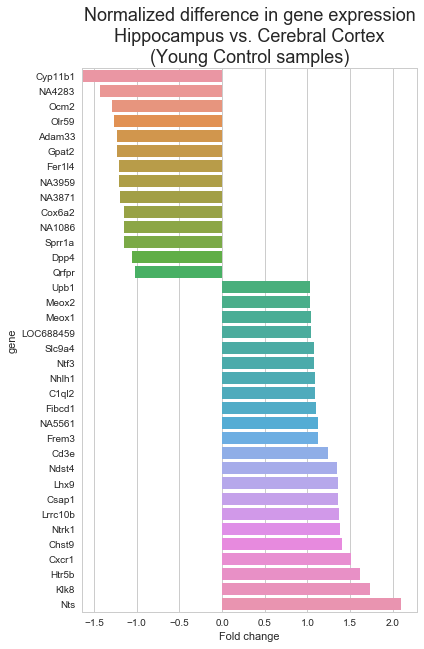

In [32]:
sns.set( style="whitegrid" )
figure, axes = plt.subplots( figsize=(6, 10) )
sns.barplot( data=plot_these, x="zscore", y="gene" )
chart_title = """Normalized difference in gene expression
Hippocampus vs. Cerebral Cortex
(Young Control samples)"""
axes.set_title( chart_title, size=18 )
axes.set_xlabel( "Fold change")

## Save the figure as a PDF:

In [31]:
figure.savefig( "ribbonplot.pdf")

# DONE!

# On your own:


In [5]:
Suv420h1 = df[df.Symbol == 'Suv420h1']

In [19]:
Suv420h1.columns

Index(['ArrayID', 'Symbol', 'AVG_Signal_BR1_TEST_O_1',
       'AVG_Signal_BR1_TEST_O_2', 'AVG_Signal_BR1_TEST_O_3',
       'AVG_Signal_BR1_TEST_O_4', 'AVG_Signal_BR1_TEST_Y_1',
       'AVG_Signal_BR1_TEST_Y_2', 'AVG_Signal_BR1_TEST_Y_3',
       'AVG_Signal_BR1_TEST_Y_4', 'AVG_Signal_BR1_CONTROL_O_1',
       'AVG_Signal_BR1_CONTROL_O_2', 'AVG_Signal_BR1_CONTROL_O_3',
       'AVG_Signal_BR1_CONTROL_Y_1', 'AVG_Signal_BR1_CONTROL_Y_2',
       'AVG_Signal_BR1_CONTROL_Y_3', 'AVG_Signal_BR1_CONTROL_Y_4',
       'AVG_Signal_BR2_TEST_O_1', 'AVG_Signal_BR2_TEST_O_2',
       'AVG_Signal_BR2_TEST_O_3', 'AVG_Signal_BR2_TEST_O_4',
       'AVG_Signal_BR2_TEST_Y_1', 'AVG_Signal_BR2_TEST_Y_2',
       'AVG_Signal_BR2_TEST_Y_3', 'AVG_Signal_BR2_TEST_Y_4',
       'AVG_Signal_BR2_CONTROL_O_1', 'AVG_Signal_BR2_CONTROL_O_2',
       'AVG_Signal_BR2_CONTROL_O_3', 'AVG_Signal_BR2_CONTROL_O_4',
       'AVG_Signal_BR2_CONTROL_Y_1', 'AVG_Signal_BR2_CONTROL_Y_2',
       'AVG_Signal_BR2_CONTROL_Y_3', 'AVG_Signal_BR2

In [7]:
from scipy.stats.mstats import kruskalwallis

In [17]:
Suv420h1[ Suv420h1.columns[2:]].as_matrix().T

array([[ 3489.667 ,   342.7536,  3543.772 ,  3480.075 ,   360.5167,
          354.0101,   377.8154,  3334.497 ,   361.9391,   382.2341,
          363.5269,   333.4587,  3483.586 ,  3327.763 ,   413.9088,
         3312.904 ,   398.6894,  3274.656 ,  3620.349 ,  3227.726 ],
       [ 2639.498 ,   282.0036,  2632.292 ,  2601.357 ,   328.7193,
          314.7441,   294.0218,  2573.176 ,   317.2552,   331.4735,
          316.1163,   308.6923,  2516.118 ,  2507.476 ,   329.4245,
         2617.768 ,   311.4156,  2480.783 ,  2560.056 ,  2525.45  ],
       [ 2876.917 ,   379.509 ,  3024.015 ,  2937.448 ,   377.0802,
          365.8818,   392.6335,  2826.608 ,   371.7557,   401.4565,
          368.5963,   379.8986,  2878.745 ,  2886.556 ,   387.0985,
         2669.294 ,   375.2104,  2904.073 ,  2886.647 ,  2863.437 ],
       [ 1851.872 ,   241.7938,  1935.529 ,  1825.163 ,   234.9722,
          234.1275,   270.086 ,  1825.918 ,   237.1046,   235.4798,
          258.981 ,   213.4933,  1798.143 ,  

In [15]:
?kruskalwallis

In [18]:
kruskalwallis( *Suv420h1[ Suv420h1.columns[2:]].as_matrix().T)

KruskalResult(statistic=138.8275486987684, pvalue=6.1623592332344918e-16)

In [20]:
br2_control_Y_cols = ['AVG_Signal_BR2_CONTROL_Y_1', 'AVG_Signal_BR2_CONTROL_Y_2',
       'AVG_Signal_BR2_CONTROL_Y_3', 'AVG_Signal_BR2_CONTROL_Y_4']

In [21]:
kruskalwallis( *Suv420h1[ br2_control_Y_cols ].as_matrix().T)

KruskalResult(statistic=2.5916666666666686, pvalue=0.45895236119240346)

In [22]:
br2_control_O_cols = ['AVG_Signal_BR2_CONTROL_O_1', 'AVG_Signal_BR2_CONTROL_O_2',
       'AVG_Signal_BR2_CONTROL_O_3', 'AVG_Signal_BR2_CONTROL_O_4']

In [23]:
kruskalwallis( *Suv420h1[ br2_control_O_cols ].as_matrix().T)

KruskalResult(statistic=16.722777777777765, pvalue=0.00080584517919065853)

In [24]:
Suv420h1[ br2_control_O_cols ]

,AVG_Signal_BR2_CONTROL_O_1,AVG_Signal_BR2_CONTROL_O_2,AVG_Signal_BR2_CONTROL_O_3,AVG_Signal_BR2_CONTROL_O_4
3988,2453.9690,3189.3200,2118.7540,1993.3130
4232,307.7886,410.9277,228.2103,284.8570
4742,2609.8770,3139.3770,1995.2440,2065.7060
4757,2499.5070,3152.1180,2106.1940,2057.6180
5117,327.8180,383.2319,238.2811,313.2470
5165,307.4982,383.7452,224.7455,254.8551
8677,327.2883,388.2755,231.9130,282.9534
10867,2601.6060,3130.3290,1975.7410,1906.3970
15075,325.2123,377.3843,242.5061,263.7204
19300,354.4660,384.0164,235.1008,278.3628
